## Target Audience for Direct Marketing
Perform eda on cleaned datasets

Note:- CVR, or conversion rate, in in-app advertising is the percentage of users who saw an app-install ad, clicked on it, and converted through some pre-specified action. CVR tells app advertisers how many users their ad converted.<br>
The CVR formula is calculated by dividing the number of users who converted by the number of users who clicked on the ad, and then multiplying by 100.<br>
For example, if 1000 users saw an ad, and 15 users installed the advertised app, then the conversion rate would be 1.5% - meaning the ad converted 1.5% of users.

CVR = (# of users who took action / # of users who clicked on the ad) x 100

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
customers=pd.read_csv("starbucks_customer_level.csv",sep=";",parse_dates=["became_member_on"])

In [5]:
offers=pd.read_csv("starbucks_offer_level.csv",sep=";")

In [7]:
transcript=pd.read_json("transcript.json",orient="records",lines=True)
profile=pd.read_json("profile.json",orient="records",lines=True)


In [8]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [9]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [10]:
profile.became_member_on=pd.to_datetime(profile.became_member_on.astype(str),format="%Y/%m/%d")

In [11]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN


In [12]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               17000 non-null  int64         
 2   id                17000 non-null  object        
 3   became_member_on  17000 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 664.2+ KB


In [14]:
customers.head()

,gender,age,person,became_member_on,income,total_amount,total_rewarded,transactions_num,offers_received,offers_viewed,...,avg_reward_size,avg_bogo_size,avg_discount_size,offers_rr,offers_cvr,bogo_rr,bogo_cvr,discount_rr,discount_cvr,informational_rr
0,NaN,NaN,68be06ca386d4c31939f3a4f0e3dd783,2017-01-01,NaN,20.40,5.0,9,5.0,5.0,...,2.5,0.0,2.5,100.0,40.0,0.0,0.00,100.00,40.0,0.0
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-01-01,112000.0,77.01,0.0,3,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
2,NaN,NaN,38fe809add3b4fcf9315a9694bb96ff5,2018-01-01,NaN,14.30,0.0,6,2.0,1.0,...,0.0,0.0,0.0,50.0,0.0,100.0,0.00,0.00,0.0,0.0
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-01-01,100000.0,159.27,15.0,7,4.0,4.0,...,7.5,7.5,0.0,100.0,50.0,100.0,66.67,0.00,0.0,100.0
4,NaN,NaN,a03223e636434f42ac4c3df47e8bac43,2017-01-01,NaN,4.65,0.0,3,5.0,3.0,...,0.0,0.0,0.0,60.0,0.0,0.0,0.00,66.67,0.0,50.0


In [15]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   gender                  14825 non-null  object        
 1   age                     14825 non-null  float64       
 2   person                  17000 non-null  object        
 3   became_member_on        17000 non-null  datetime64[ns]
 4   income                  14825 non-null  float64       
 5   total_amount            17000 non-null  float64       
 6   total_rewarded          17000 non-null  float64       
 7   transactions_num        17000 non-null  int64         
 8   offers_received         17000 non-null  float64       
 9   offers_viewed           17000 non-null  float64       
 10  offers_completed        17000 non-null  float64       
 11  bogo_received           17000 non-null  float64       
 12  bogo_viewed             17000 non-null  float6

Text(0.5, 1.0, 'Distribution of membership distribution')

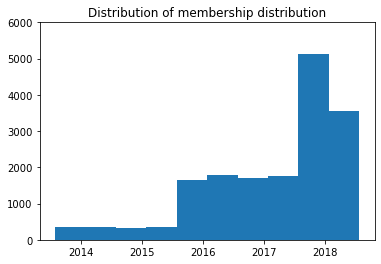

In [28]:
plt.hist(profile["became_member_on"])
plt.ylim(0,6000)
plt.title("Distribution of membership distribution")

(0.0, 6000.0)

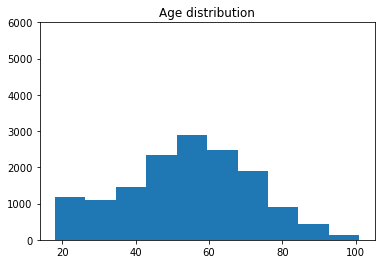

In [31]:
plt.hist(customers.age)
plt.title("Age distribution")
plt.ylim(0,6000)

(0.0, 4000.0)

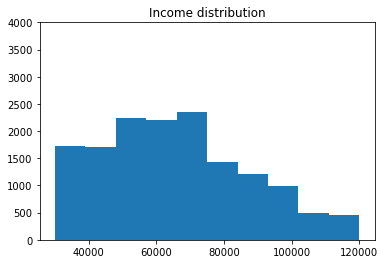

In [35]:
plt.hist(customers.income)
plt.title("Income distribution")
plt.ylim(0,4000)

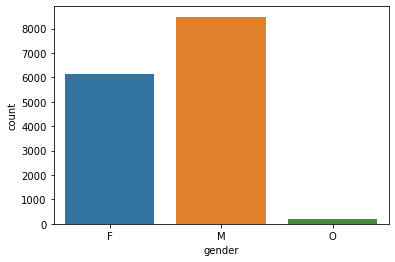

In [36]:
sns.countplot(customers.gender)

In [37]:
customers.gender.value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

In [39]:
print("Earliest member since",customers.became_member_on.min()," and recent member on",customers.became_member_on.max())

Earliest member since 2013-01-01 00:00:00  and recent member on 2018-01-01 00:00:00


In [43]:
customers.describe().T #vertical

,count,mean,std,min,25%,50%,75%,max
age,14825.0,54.393524,17.383705,18.0,42.00,55.000,66.0000,101.00
income,14825.0,65404.991568,21598.299410,30000.0,49000.00,64000.000,80000.0000,120000.00
total_amount,17000.0,104.438351,125.922619,0.0,21.82,69.405,148.7825,1608.69
total_rewarded,17000.0,5.581941,6.752801,0.0,0.00,3.000,10.0000,55.00
transactions_num,17000.0,8.173706,5.116250,0.0,4.00,7.000,11.0000,36.00
offers_received,17000.0,4.486882,1.076165,0.0,4.00,5.000,5.0000,6.00
offers_viewed,17000.0,3.266706,1.354569,0.0,2.00,3.000,4.0000,6.00
offers_completed,17000.0,1.156235,1.170933,0.0,0.00,1.000,2.0000,6.00
bogo_received,17000.0,1.794059,1.120485,0.0,1.00,2.000,3.0000,6.00
bogo_viewed,17000.0,1.465059,1.059699,0.0,1.00,1.000,2.0000,6.00


### observations
The customers are mainly of the age group 55 with average income dlr 65405 During the experiment the customers average spend is dlr 104.43 and got on average dlr 5 rewarded and maximum reward is dlr 55. On average customers would make 8 transactionsorder size of $13.

The customers would recieve 5 offers on average and max is 6. out of which 3 offers were viewed and only 1 would complete. The average return on bogo is higher than on discount ie dlr 3.8 to dlr 1.7. Each customer viewed on average 73% of offeres they recieved (Response rate). BOGO offers being reviewed more(72.5%) as compared to discount (61%) and international(39.3%).
Out of all the customers around 34% acted upon those offers with cvr for discounts being higher (38%) than for bogo(29%)

In [45]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


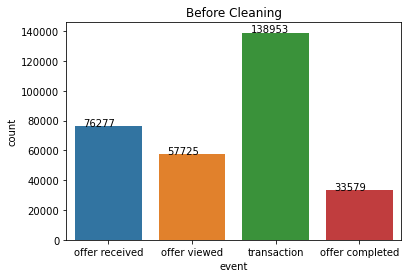

In [56]:
plt.title("Before Cleaning")
ax=sns.countplot(transcript.event)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [48]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

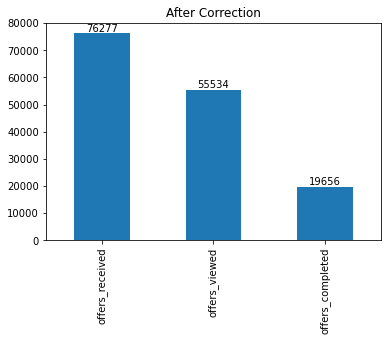

In [62]:
plt.title("After Cleaning")
f=customers[['offers_received','offers_viewed', 'offers_completed']].sum().astype(int)
f.plot.bar()
plt.title("After Correction");
for i, event_num in enumerate(f):
    #X position just after the end of the bar:
    plt.text(i, event_num, event_num, ha = 'center', va = 'bottom');

In [63]:
f

offers_received     76277
offers_viewed       55534
offers_completed    19656
dtype: int32

In [64]:
offers.head()

,person,id_unique,offer_received_time,offer_viewed_time,offer_completed_time,id,reward,channels,difficulty,duration,offer_type,offer_end_time,viewed_binary,viewed_on_time,completed_binary,completed_on_time,completed_after_viewing
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5-0.0,576.0,0.0,576.0,2906b810c7d4411798c6938adc9daaa5,2,"['web', 'email', 'mobile']",10,7,discount,744.0,0,0,1,1,0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed-0.0,336.0,372.0,0.0,3f207df678b143eea3cee63160fa8bed,0,"['web', 'email', 'mobile']",0,4,informational,432.0,1,1,0,0,0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837-0.0,168.0,192.0,0.0,5a8bc65990b245e5a138643cd4eb9837,0,"['email', 'mobile', 'social']",0,3,informational,240.0,1,1,0,0,0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d-0.0,408.0,456.0,414.0,f19421c1d4aa40978ebb69ca19b0e20d,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,528.0,1,1,1,1,0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4-0.0,504.0,540.0,528.0,fafdcd668e3743c1bb461111dcafc2a4,2,"['web', 'email', 'mobile', 'social']",10,10,discount,744.0,1,1,1,1,0


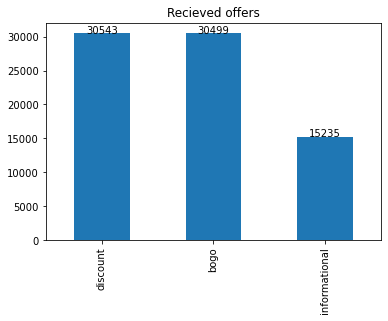

In [84]:
t=offers.offer_type.value_counts()
plt.title("Recieved offers")
t.plot.bar()
for i,j in enumerate(t):
    plt.text(i,j,j,horizontalalignment='center')

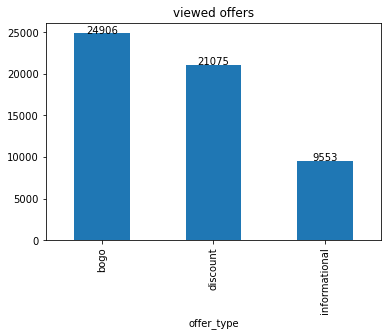

In [85]:
viewed_by_offer_type=offers[offers.viewed_on_time==1].groupby('offer_type').viewed_on_time.count()
plt.title("viewed offers")
viewed_by_offer_type.plot.bar()
for i ,j in enumerate(viewed_by_offer_type):
    plt.text(i,j,j,horizontalalignment='center')

(0.0, 30000.0)

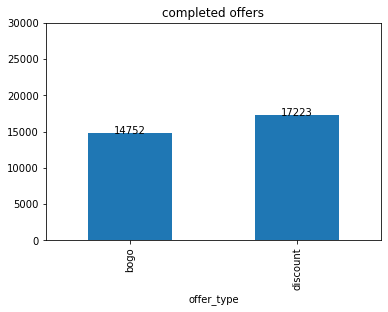

In [94]:
completed_by_offer_type=offers[offers.completed_on_time==1].groupby("offer_type").completed_on_time.count()
completed_by_offer_type.plot.bar()
plt.title("completed offers")
for i ,j in enumerate(completed_by_offer_type):
    plt.text(i,j,j,ha="center")
plt.ylim(0,30000)

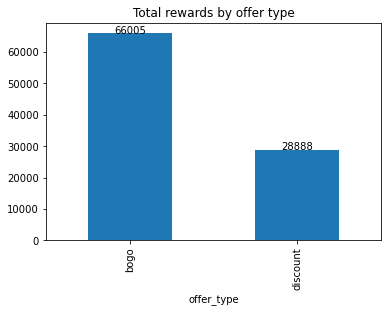

In [96]:
rewards=offers[offers.completed_after_viewing==1].groupby("offer_type")["reward"].sum()
plt.title("Total rewards by offer type")
rewards.plot.bar()
for i,j in enumerate(rewards):
    plt.text(i,j,j,ha="center")


## Customers Engagement with Offers - RR and CVR

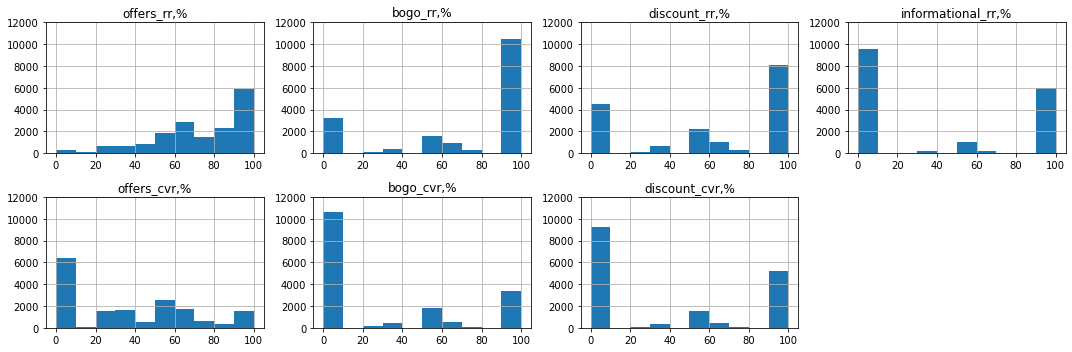

In [98]:
cols = ['offers_rr', 'bogo_rr', 'discount_rr', 'informational_rr', 'offers_cvr', 'bogo_cvr', 'discount_cvr',]
plt.figure(figsize=(15, 5));

for i,j in enumerate(customers[cols]):
    plt.subplot(2,4,i+1)
    customers[j].hist()
    plt.title(f"{j},%");
    plt.ylim(0, 12000);
    plt.tight_layout();

Note: people view offers much more often than complete. Bogos viewed ofter than discounts or informational. However, customers complete discount offers more often than bogos.

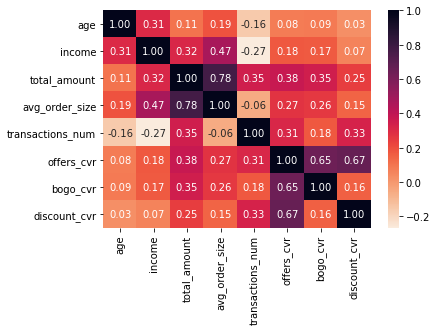

In [99]:
cols = ['became_member_on', 'age', 'income', 'total_amount', 'avg_order_size', 'transactions_num', 'offers_cvr', 'bogo_cvr', 'discount_cvr']
sns.heatmap(customers[cols].corr(), cmap = 'rocket_r', annot = True, fmt = '.2f');

Note: not profile, but spending habits (like number of transactions and total amount) seem to correlate more with the conversion rates. For bogo_cvr total amount spent seems to be more defining, while for discount_cvr - transactions frequency.

## Customers-Offers Interaction

In [106]:
print(f"{(customers.offers_received!=0).sum()} customers recieved offers","and",f"{(customers.offers_received==0).sum()} did not")

16994 customers recieved offers and 6 did not


In [121]:
print("out of those who recieved ",f"{((customers.offers_received!=0) & (customers.offers_viewed!=0)).sum()} customers viewed the offer and ",f"{((customers.offers_received!=0)&(customers.offers_viewed==0)).sum()} did not")

out of those who recieved  16735 customers viewed the offer and  259 did not


In [139]:
print(f"out of those who received {((customers.offers_received!=0)&(customers.offers_viewed!=0)&(customers.offers_completed !=0)).sum()} completed the offer")

out of those who received 10640 completed the offer


### viewing rate

In [141]:
# total viewing rate - % customers who viewed the offers on time
viewing_rate = (customers.offers_viewed > 0).sum()
print(f"{viewing_rate/customers.shape[0]*100:.1f}% of customers viewed offers on time")

98.4% of customers viewed offers on time


### Rewarded Rate

In [143]:
#total rewarded rate - % customers who completed the offers 
rewarded_rate = (customers.offers_completed > 0).sum()
print(f"{rewarded_rate/customers.shape[0]*100:.1f}% of customers completed offers after viewing")

62.6% of customers completed offers after viewing
